In [2]:
import pandas as pd
import pandasql as ps
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
table = pq.read_table("dadesagbar.parquet")
df = table.to_pandas()
df.columns = [col.split('/')[0] for col in df.columns]
df[(df["Data"]=="2023-01-01")&(df["Ús"]=="Domèstic/Doméstico/Domestic")]["Nombre de comptadors"].sum()
df.columns

Index(['Secció censal', 'Districte', 'Municipi', 'Data', 'Ús',
       'Nombre de comptadors', 'Consum acumulat (L'],
      dtype='object')

In [45]:
df2 = pd.crosstab([df["Data"], df["Districte"]], df["Ús"], df["Nombre de comptadors"], aggfunc ="sum")
df2


Ús                    Comercial/Comercial/Commercial  \
Data       Districte                                   
2023-01-01 03                                    NaN   
           06                                    NaN   
           1                                  4397.0   
           10                                 7133.0   
           2                                 13594.0   
...                                              ...   
2023-12-31 6                                  5622.0   
           7                                  4493.0   
           8                                  4009.0   
           9                                  3987.0   
           >                                   345.0   

Ús                    Domèstic/Doméstico/Domestic  \
Data       Districte                                
2023-01-01 03                                40.0   
           06                                 5.0   
           1                              33556.0   
           10                             81592.0   
           2                              92806.0   
...                                           ...   
2023-12-31 6                              52163.0   
           7                              64946.0   
           8                              59662.0   
           9                              51039.0   
           >                               2917.0   

Ús                    Industrial/Industrial/Industrial  
Data       Districte                                    
2023-01-01 03                                      2.0  
           06                                      NaN  
           1                                     439.0  
           10                                    447.0  
           2                                     461.0  
...                                                ...  
2023-12-31 6                                     247.0  
           7                                     203.0  
           8                                      70.0  
           9                                     294.0  
           >                                     301.0  

[4745 rows x 3 columns]

In [25]:
df3 =pd.merge(df2, df, on="Data") 
df3

,Data,Comercial/Comercial/Commercial,Domèstic/Doméstico/Domestic,Industrial/Industrial/Industrial,Secció censal,Districte,Municipi,Ús,Nombre de comptadors,Consum acumulat (L,Date,Month,Day
0,2023-01-01,5019903,20330832,19227083,801901001,1,BARCELONA,Comercial/Comercial/Commercial,64,14258,2023-01-01,2023-01,2023-01-01
1,2023-01-01,5019903,20330832,19227083,801901001,1,BARCELONA,Domèstic/Doméstico/Domestic,395,11089,2023-01-01,2023-01,2023-01-01
2,2023-01-01,5019903,20330832,19227083,801901001,1,BARCELONA,Industrial/Industrial/Industrial,20,490360,2023-01-01,2023-01,2023-01-01
3,2023-01-01,5019903,20330832,19227083,801901002,1,BARCELONA,Comercial/Comercial/Commercial,42,10493,2023-01-01,2023-01,2023-01-01
4,2023-01-01,5019903,20330832,19227083,801901002,1,BARCELONA,Domèstic/Doméstico/Domestic,321,9068,2023-01-01,2023-01,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
963414,2023-12-31,6732660,13861966,27333877,<NULL>,>,BARCELONA,Domèstic/Doméstico/Domestic,2917,80369,2023-12-31,2023-12,2023-12-31
963415,2023-12-31,6732660,13861966,27333877,<NULL>,>,BARCELONA,Industrial/Industrial/Industrial,301,410164,2023-12-31,2023-12,2023-12-31
963416,2023-12-31,6732660,13861966,27333877,None,None,BARCELONA,Comercial/Comercial/Commercial,237,20749,2023-12-31,2023-12,2023-12-31
963417,2023-12-31,6732660,13861966,27333877,None,None,BARCELONA,Domèstic/Doméstico/Domestic,2082,53443,2023-12-31,2023-12,2023-12-31


Separar segons tipus de consum (industrial, domèstic, comercial)


In [4]:

df.groupby("Ús")['Consum acumulat (L'].sum()

Ús
Comercial/Comercial/Commercial       3064086088
Domèstic/Doméstico/Domestic          7607738215
Industrial/Industrial/Industrial    12200551029
Name: Consum acumulat (L, dtype: int64

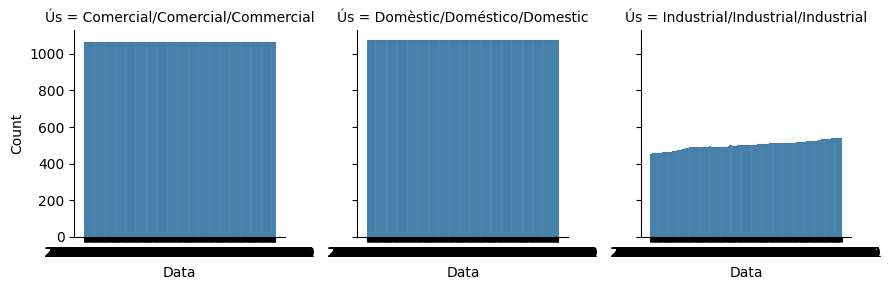

In [10]:
sns.displot(
    df, x="Data", col="Ús",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [7]:
censal = df.groupby("Secció censal")['Consum acumulat (L'].sum().reset_index()
censal.to_csv("seccioncensal.csv", index=False)



In [11]:
df['Date'] = pd.to_datetime(df['Data'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)


df['Consum acumulat (L'] = pd.to_numeric(df['Consum acumulat (L'], errors='coerce')

grouped = df.groupby(['Month', 'Ús'])['Consum acumulat (L'].sum().reset_index()

total_per_month = grouped.groupby('Month')['Consum acumulat (L'].transform('sum')

grouped['Percentage'] = (grouped['Consum acumulat (L'] / total_per_month) * 100


In [12]:
grouped

,Month,Ús,Consum acumulat (L,Percentage
0,2023-01,Comercial/Comercial/Commercial,241509584,14.337133
1,2023-01,Domèstic/Doméstico/Domestic,670573061,39.808338
2,2023-01,Industrial/Industrial/Industrial,772421397,45.854529
3,2023-02,Comercial/Comercial/Commercial,218148947,11.347257
4,2023-02,Domèstic/Doméstico/Domestic,915243490,47.607396
5,2023-02,Industrial/Industrial/Industrial,789089301,41.045347
6,2023-03,Comercial/Comercial/Commercial,254520175,10.314711
7,2023-03,Domèstic/Doméstico/Domestic,1215641612,49.265217
8,2023-03,Industrial/Industrial/Industrial,997383658,40.420073
9,2023-04,Comercial/Comercial/Commercial,241271866,8.894800


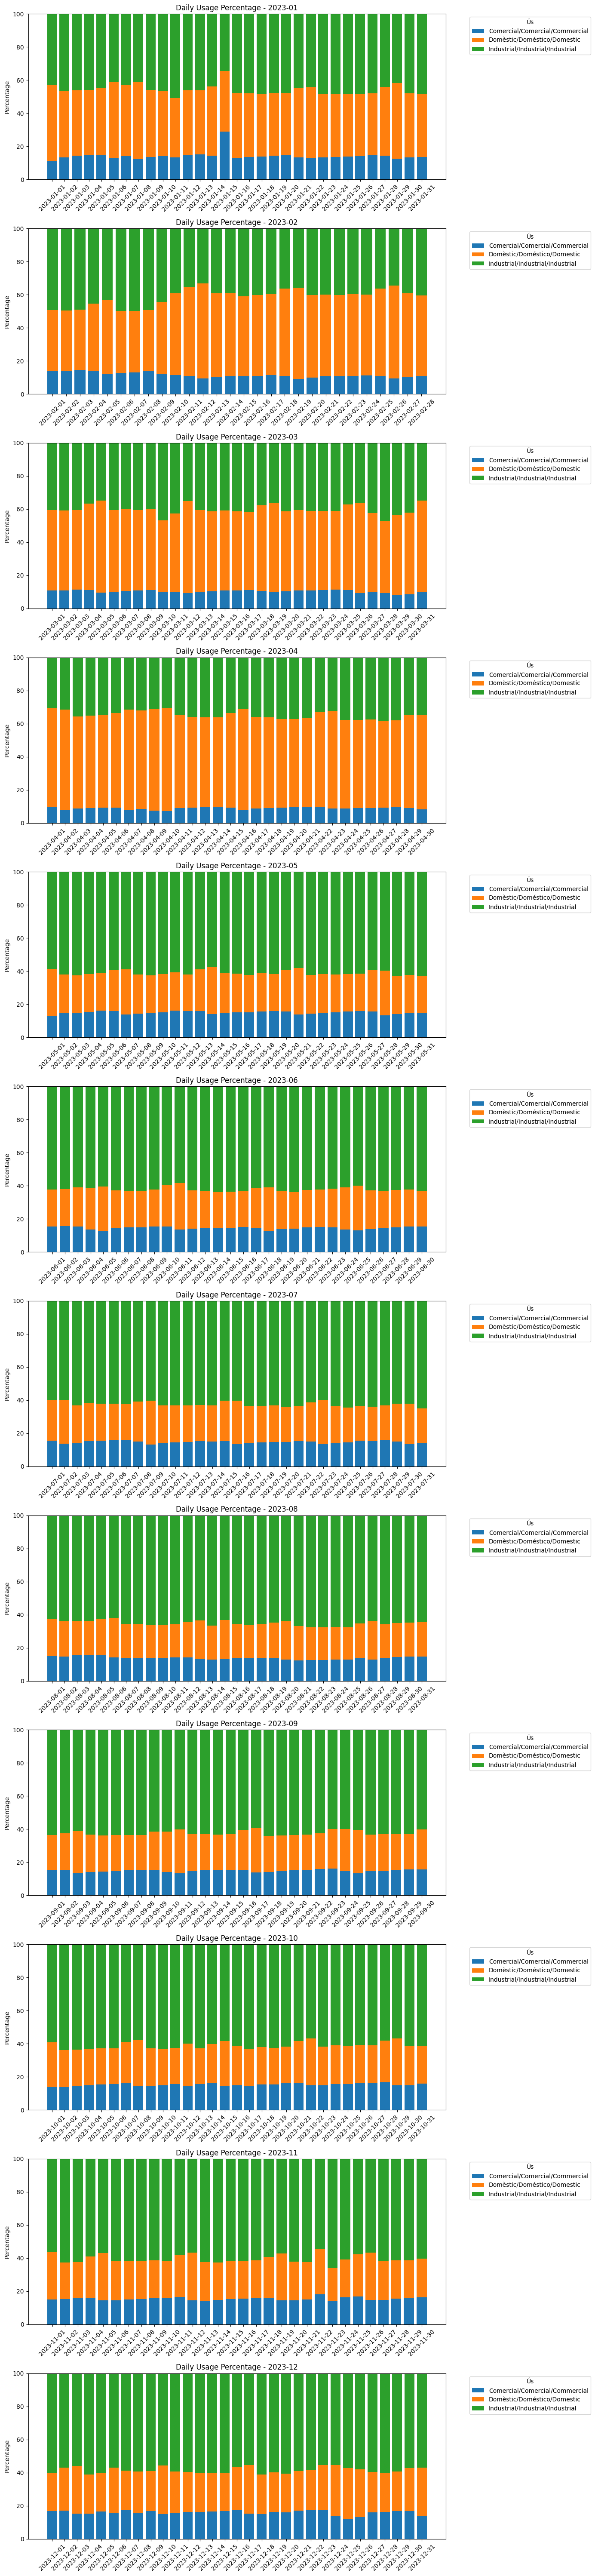

In [ ]:
df['Date'] = pd.to_datetime(df['Data'])
df['Day'] = df['Date'].dt.date.astype(str)   # for plotting on x-axis
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Ensure numeric
df['Consum acumulat (L'] = pd.to_numeric(df['Consum acumulat (L'], errors='coerce')

# Group by Day + Usage to get daily consumption per category
daily_usage = df.groupby(['Day', 'Ús'])['Consum acumulat (L'].sum().reset_index()

# Pivot to make each 'Ús' a column
pivoted = daily_usage.pivot(index='Day', columns='Ús', values='Consum acumulat (L').fillna(0)

# Normalize each day's total to 100% for stacked bar chart
pivoted_percent = pivoted.div(pivoted.sum(axis=1), axis=0) * 100

# Add month for splitting later
pivoted_percent['Month'] = pd.to_datetime(pivoted_percent.index).to_period('M').astype(str)

# Get unique months
months = pivoted_percent['Month'].unique()
n_months = len(months)

# Plot setup
fig, axes = plt.subplots(n_months, 1, figsize=(14, 5 * n_months), sharex=False)

# Ensure axes is iterable
if n_months == 1:
    axes = [axes]

# Plot for each month
for i, month in enumerate(months):
    ax = axes[i]
    month_data = pivoted_percent[pivoted_percent['Month'] == month].drop(columns='Month')
    
    # Stacked bar plot
    bottom = None
    for col in month_data.columns:
        if bottom is None:
            ax.bar(month_data.index, month_data[col], label=col)
            bottom = month_data[col]
        else:
            ax.bar(month_data.index, month_data[col], bottom=bottom, label=col)
            bottom += month_data[col]

    ax.set_title(f"Daily Usage Percentage - {month}")
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)
    ax.legend(title="Ús", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963419 entries, 0 to 963418
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Secció censal         962324 non-null  object        
 1   Districte             962324 non-null  object        
 2   Municipi              963419 non-null  object        
 3   Data                  963419 non-null  object        
 4   Ús                    963419 non-null  object        
 5   Nombre de comptadors  963419 non-null  int64         
 6   Consum acumulat (L    963419 non-null  int64         
 7   Date                  963419 non-null  datetime64[ns]
 8   Month                 963419 non-null  object        
 9   Day                   963419 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 73.5+ MB


In [15]:
embalses = pd.read_csv("embalses.csv")
embalses.rename(columns={"Dia":"Data"},inplace=True)


In [16]:
desalinizadores = pd.read_csv("desalinizadores.csv")

In [17]:
desalinizadores.drop("Unnamed: 0",axis=1,inplace=True)

In [18]:
desalinizadores.rename(columns={"Dia":"Data"},inplace=True)
desaliniz_fix = pd.crosstab(desalinizadores["Data"], desalinizadores["Nom estació"], desalinizadores["Volum (hm3)"], aggfunc ="sum")

In [19]:
fusion1=pd.merge(df,desaliniz_fix, on="Data")
fusion1

,Secció censal,Districte,Municipi,Data,Ús,Nombre de comptadors,Consum acumulat (L,Date,Month,Day,ATLL CGC - Blanes. ITAM Tordera,ATLL CGC - Cabalímetre ITAM Llobregat (Z05b ITAM)
0,801901001,1,BARCELONA,2023-01-01,Comercial/Comercial/Commercial,64,14258,2023-01-01,2023-01,2023-01-01,0.043459,0.161176
1,801901001,1,BARCELONA,2023-01-01,Domèstic/Doméstico/Domestic,395,11089,2023-01-01,2023-01,2023-01-01,0.043459,0.161176
2,801901001,1,BARCELONA,2023-01-01,Industrial/Industrial/Industrial,20,490360,2023-01-01,2023-01,2023-01-01,0.043459,0.161176
3,801901001,1,BARCELONA,2023-01-02,Comercial/Comercial/Commercial,64,6780,2023-01-02,2023-01,2023-01-02,0.041487,0.159768
4,801901001,1,BARCELONA,2023-01-02,Domèstic/Doméstico/Domestic,395,11571,2023-01-02,2023-01,2023-01-02,0.041487,0.159768
...,...,...,...,...,...,...,...,...,...,...,...,...
963414,None,None,BARCELONA,2023-12-30,Domèstic/Doméstico/Domestic,2082,48293,2023-12-30,2023-12,2023-12-30,0.053336,0.174112
963415,None,None,BARCELONA,2023-12-30,Industrial/Industrial/Industrial,87,255366,2023-12-30,2023-12,2023-12-30,0.053336,0.174112
963416,None,None,BARCELONA,2023-12-31,Comercial/Comercial/Commercial,237,20749,2023-12-31,2023-12,2023-12-31,0.057480,0.173696
963417,None,None,BARCELONA,2023-12-31,Domèstic/Doméstico/Domestic,2082,53443,2023-12-31,2023-12,2023-12-31,0.057480,0.173696


In [20]:
fusion2=pd.merge(fusion1, embalses, on="Data")
fusion2

,Secció censal,Districte,Municipi,Data,Ús,Nombre de comptadors,Consum acumulat (L,Date,Month,Day,ATLL CGC - Blanes. ITAM Tordera,ATLL CGC - Cabalímetre ITAM Llobregat (Z05b ITAM),Volum embassat (hm3),Capacidad embalse (hm3),% prom de disponibilidad
0,801901001,1,BARCELONA,2023-01-01,Comercial/Comercial/Commercial,64,14258,2023-01-01,2023-01,2023-01-01,0.043459,0.161176,215.60,694.41,31.05
1,801901001,1,BARCELONA,2023-01-01,Domèstic/Doméstico/Domestic,395,11089,2023-01-01,2023-01,2023-01-01,0.043459,0.161176,215.60,694.41,31.05
2,801901001,1,BARCELONA,2023-01-01,Industrial/Industrial/Industrial,20,490360,2023-01-01,2023-01,2023-01-01,0.043459,0.161176,215.60,694.41,31.05
3,801901001,1,BARCELONA,2023-01-02,Comercial/Comercial/Commercial,64,6780,2023-01-02,2023-01,2023-01-02,0.041487,0.159768,215.26,694.40,31.00
4,801901001,1,BARCELONA,2023-01-02,Domèstic/Doméstico/Domestic,395,11571,2023-01-02,2023-01,2023-01-02,0.041487,0.159768,215.26,694.40,31.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963414,None,None,BARCELONA,2023-12-30,Domèstic/Doméstico/Domestic,2082,48293,2023-12-30,2023-12,2023-12-30,0.053336,0.174112,116.77,695.72,16.78
963415,None,None,BARCELONA,2023-12-30,Industrial/Industrial/Industrial,87,255366,2023-12-30,2023-12,2023-12-30,0.053336,0.174112,116.77,695.72,16.78
963416,None,None,BARCELONA,2023-12-31,Comercial/Comercial/Commercial,237,20749,2023-12-31,2023-12,2023-12-31,0.057480,0.173696,116.46,693.63,16.79
963417,None,None,BARCELONA,2023-12-31,Domèstic/Doméstico/Domestic,2082,53443,2023-12-31,2023-12,2023-12-31,0.057480,0.173696,116.46,693.63,16.79


In [21]:
clima = pd.read_csv("df_dias.csv")
finaldataset = pd.merge(fusion2, clima, on="Data")
finaldataset.to_csv("finaldataset.csv", index=False)

In [22]:
finaldataset

,Secció censal,Districte,Municipi,Data,Ús,Nombre de comptadors,Consum acumulat (L,Date,Month,Day,ATLL CGC - Blanes. ITAM Tordera,ATLL CGC - Cabalímetre ITAM Llobregat (Z05b ITAM),Volum embassat (hm3),Capacidad embalse (hm3),% prom de disponibilidad,Precipitacion_acumulada_diaria,Temperatura_maxima_diaria,Temperatura_minima_diaria,Horas_insolacion
0,801901001,1,BARCELONA,2023-01-01,Comercial/Comercial/Commercial,64,14258,2023-01-01,2023-01,2023-01-01,0.043459,0.161176,215.60,694.41,31.05,0.0,15.3,10.8,2.2
1,801901001,1,BARCELONA,2023-01-01,Domèstic/Doméstico/Domestic,395,11089,2023-01-01,2023-01,2023-01-01,0.043459,0.161176,215.60,694.41,31.05,0.0,15.3,10.8,2.2
2,801901001,1,BARCELONA,2023-01-01,Industrial/Industrial/Industrial,20,490360,2023-01-01,2023-01,2023-01-01,0.043459,0.161176,215.60,694.41,31.05,0.0,15.3,10.8,2.2
3,801901001,1,BARCELONA,2023-01-02,Comercial/Comercial/Commercial,64,6780,2023-01-02,2023-01,2023-01-02,0.041487,0.159768,215.26,694.40,31.00,0.1,14.7,10.9,1.4
4,801901001,1,BARCELONA,2023-01-02,Domèstic/Doméstico/Domestic,395,11571,2023-01-02,2023-01,2023-01-02,0.041487,0.159768,215.26,694.40,31.00,0.1,14.7,10.9,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963414,None,None,BARCELONA,2023-12-30,Domèstic/Doméstico/Domestic,2082,48293,2023-12-30,2023-12,2023-12-30,0.053336,0.174112,116.77,695.72,16.78,0.0,16.9,7.7,8.3
963415,None,None,BARCELONA,2023-12-30,Industrial/Industrial/Industrial,87,255366,2023-12-30,2023-12,2023-12-30,0.053336,0.174112,116.77,695.72,16.78,0.0,16.9,7.7,8.3
963416,None,None,BARCELONA,2023-12-31,Comercial/Comercial/Commercial,237,20749,2023-12-31,2023-12,2023-12-31,0.057480,0.173696,116.46,693.63,16.79,0.0,16.1,8.7,5.0
963417,None,None,BARCELONA,2023-12-31,Domèstic/Doméstico/Domestic,2082,53443,2023-12-31,2023-12,2023-12-31,0.057480,0.173696,116.46,693.63,16.79,0.0,16.1,8.7,5.0


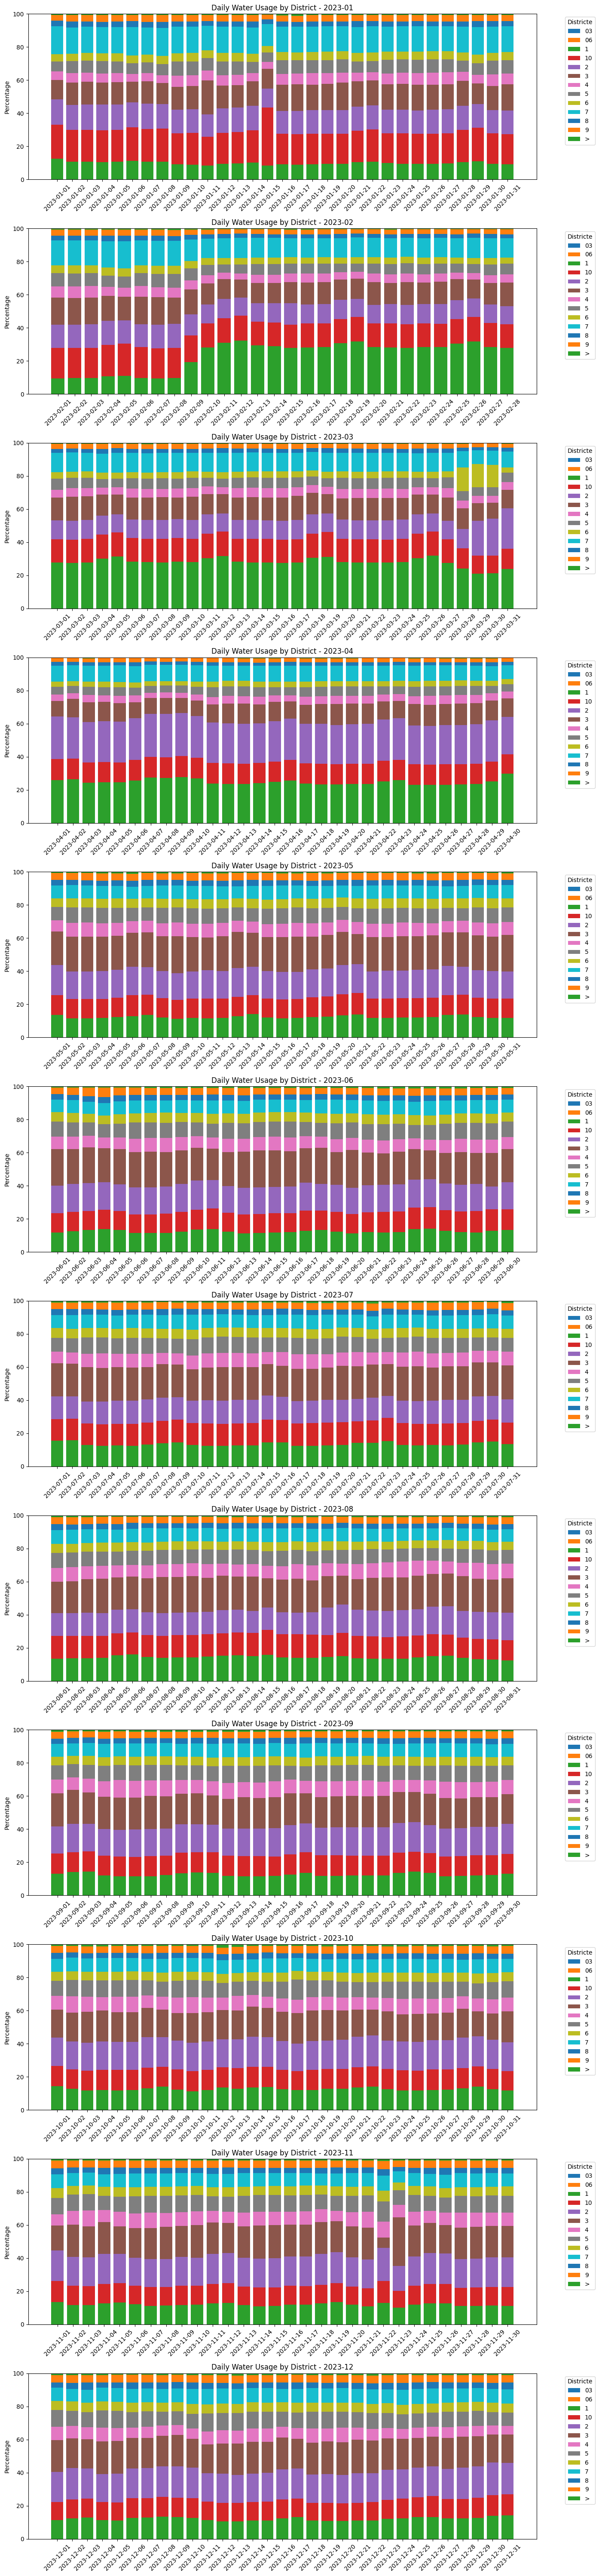

In [ ]:
# Step 1: Convert and prepare
df['Date'] = pd.to_datetime(df['Data'])
df['Day'] = df['Date'].dt.date.astype(str)   # for x-axis
df['Month'] = df['Date'].dt.to_period('M').astype(str)

df['Districte'] = pd.to_numeric(df['Districte'], errors='coerce')

# Ensure numeric for consumption
df['Consum acumulat (L'] = pd.to_numeric(df['Consum acumulat (L'], errors='coerce')

# Step 2: Group by Day + Districte to get daily consumption per district
daily_district = df.groupby(['Day', 'Districte'])['Consum acumulat (L'].sum().reset_index()

# Step 3: Pivot to have districts as columns
pivoted = daily_district.pivot(index='Day', columns='Districte', values='Consum acumulat (L').fillna(0)

# Step 4: Normalize each day's total to 100% for a stacked bar chart
pivoted_percent = pivoted.div(pivoted.sum(axis=1), axis=0) * 100

# Step 5: Add 'Month' for subplot grouping
pivoted_percent['Month'] = pd.to_datetime(pivoted_percent.index).to_period('M').astype(str)

# Step 6: Plotting setup
months = pivoted_percent['Month'].unique()
n_months = len(months)

fig, axes = plt.subplots(n_months, 1, figsize=(14, 5 * n_months), sharex=False)

# Ensure axes is always iterable
if n_months == 1:
    axes = [axes]

# Step 7: Plot for each month
for i, month in enumerate(months):
    ax = axes[i]
    month_data = pivoted_percent[pivoted_percent['Month'] == month].drop(columns='Month')
    
    # Stacked bar plot per district
    bottom = None
    for col in month_data.columns:
        if bottom is None:
            ax.bar(month_data.index, month_data[col], label=col)
            bottom = month_data[col]
        else:
            ax.bar(month_data.index, month_data[col], bottom=bottom, label=col)
            bottom += month_data[col]

    ax.set_title(f"Daily Water Usage by District - {month}")
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)
    ax.legend(title="Districte", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [53]:

# Step 1: Convert dates and ensure numeric
df['Date'] = pd.to_datetime(df['Data'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)
df['Consum acumulat (L'] = pd.to_numeric(df['Consum acumulat (L'], errors='coerce')

# pas 1.5 - filtrar segons ús domèstic
df_domestic = df[df['Ús'] == 'Domèstic']
# Step 2: Group by Month and District
 
monthly_usage = df.groupby(['Month', 'Districte'])['Consum acumulat (L'].sum().reset_index()

# Step 3: Get top 3 districts per month using groupby + nlargest
top3_per_month = (
    monthly_usage
    .groupby('Month', group_keys=False)
    .apply(lambda g: g.nlargest(3, 'Consum acumulat (L'))
    .reset_index(drop=True)
)

# View result
print(top3_per_month)

      Month Districte  Consum acumulat (L
0   2023-01        10           325860875
1   2023-01         7           261467395
2   2023-01         3           245406758
3   2023-02         1           462763904
4   2023-02        10           295707616
5   2023-02         3           259803376
6   2023-03         1           675424675
7   2023-03        10           336785706
8   2023-03         3           314429660
9   2023-04         1           667036610
10  2023-04         2           660212952
11  2023-04        10           332893298
12  2023-05         3           355813257
13  2023-05         2           290281546
14  2023-05         1           211349169
15  2023-06         3           362167815
16  2023-06         2           288339892
17  2023-06         1           218099354
18  2023-07         3           360857314
19  2023-07         2           252167940
20  2023-07         1           243221844
21  2023-08         3           341329662
22  2023-08         2           25

/tmp/ipykernel_50460/3056817640.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.nlargest(3, 'Consum acumulat (L'))


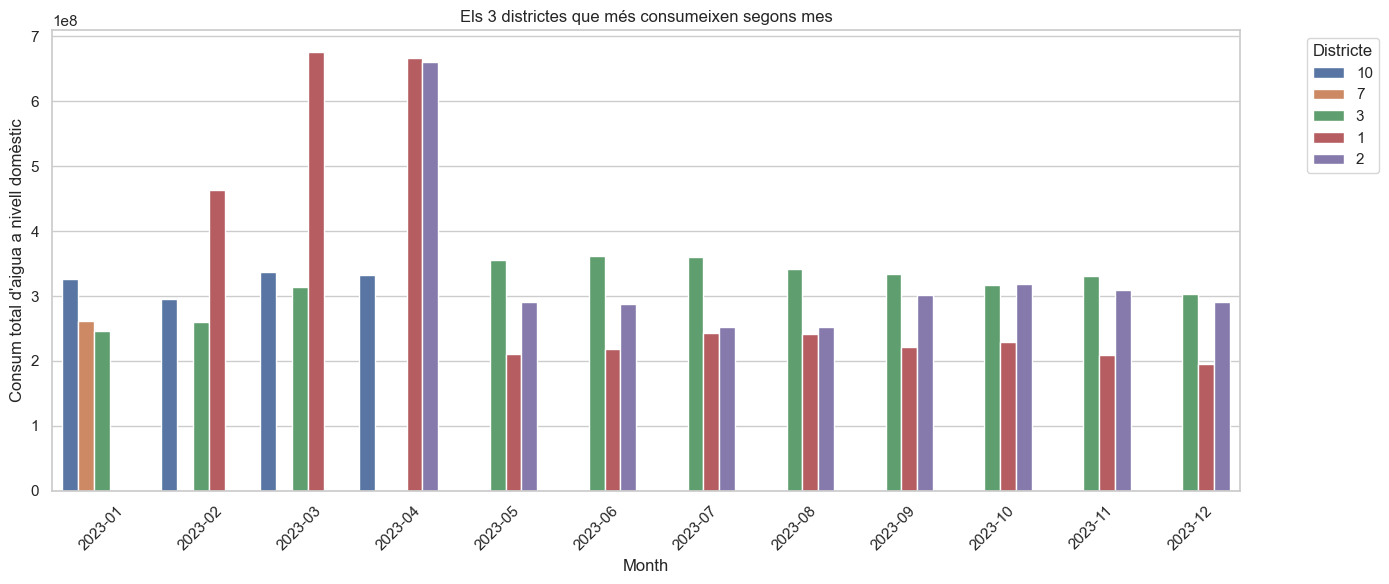

In [56]:
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top3_per_month,
    x='Month',
    y='Consum acumulat (L',
    hue='Districte',
    dodge=True
)

# Labels and formatting
plt.title('Els 3 districtes que més consumeixen segons mes')
plt.ylabel("Consum total d'aigua a nivell domèstic")
plt.xticks(rotation=45)
plt.legend(title='Districte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

df_numeric = df.select_dtypes(include=[np.number])

df_clean = df_numeric.dropna()

df = df.apply(pd.to_numeric, errors='coerce')

df_clean = df.dropna()

kmeans = KMeans(n_clusters= 10)
 
label = kmeans.fit_predict(df)

filtered_label0 = df[label == 0]
 
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()
 
print(label)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

consumo per cápita - edad media por seccion censal, % de hombres o demujeres, % de población mayor

In [ ]:
# Step 1: Convert and prepare
df['Date'] = pd.to_datetime(df['Data'])
df['Day'] = df['Date'].dt.date.astype(str)   # for x-axis
df['Month'] = df['Date'].dt.to_period('M').astype(str)

df['Districte'] = pd.to_numeric(df['Districte'], errors='coerce')

# Ensure numeric for consumption
df['Consum acumulat (L'] = pd.to_numeric(df['Consum acumulat (L'], errors='coerce')

# Step 2: Group by Day + Districte to get daily consumption per district
daily_district = df.groupby(['Day', 'Districte'])['Consum acumulat (L'].sum().reset_index()

# Step 3: Pivot to have districts as columns
pivoted = daily_district.pivot(index='Day', columns='Districte', values='Consum acumulat (L').fillna(0)

# Step 4: Normalize each day's total to 100% for a stacked bar chart
pivoted_percent = pivoted.div(pivoted.sum(axis=1), axis=0) * 100

# Step 5: Add 'Month' for subplot grouping
pivoted_percent['Month'] = pd.to_datetime(pivoted_percent.index).to_period('M').astype(str)

# Step 6: Plotting setup
months = pivoted_percent['Month'].unique()
n_months = len(months)

fig, axes = plt.subplots(n_months, 1, figsize=(14, 5 * n_months), sharex=False)

# Ensure axes is always iterable
if n_months == 1:
    axes = [axes]

# Step 7: Plot for each month
for i, month in enumerate(months):
    ax = axes[i]
    month_data = pivoted_percent[pivoted_percent['Month'] == month].drop(columns='Month')
    
    # Stacked bar plot per district
    bottom = None
    for col in month_data.columns:
        if bottom is None:
            ax.bar(month_data.index, month_data[col], label=col)
            bottom = month_data[col]
        else:
            ax.bar(month_data.index, month_data[col], bottom=bottom, label=col)
            bottom += month_data[col]

    ax.set_title(f"Daily Water Usage by District - {month}")
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)
    ax.legend(title="Districte", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

regresion lineal person
reg lin entre consumo per capita y poblacion
luego clustering 